# Face

In [13]:
from deepface import DeepFace
import numpy as np

img_path = 'data/MP002XM1ZN91_12860975_2_v1_2x.jpg'
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib"]

model = DeepFace.build_model(models[0])
embedding = DeepFace.represent(img_path, model=model)

embedding = np.array(embedding)
embedding.shape

(2622,)

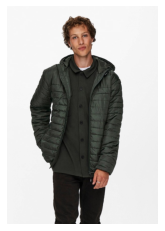

(128,)

In [61]:
import matplotlib.pyplot as plt

clothes = np.load('../data/lamoda/transformed/AU012EMIQWY9_10738017_1_v1_2x.jpg.npy')
clothes = np.load('../data/lamoda/transformed/AU012EMIQWZ3_10738025_1_v1_2x.jpg.npy')
clothes = plt.imread('data/preprocessing/original2.jpg')

plt.imshow(
    clothes,
    # clothes.transpose(1, 2, 0),
)
plt.axis('off')

plt.show()

embedding = DeepFace.represent(
    'data/preprocessing/original2.jpg',
    # clothes.transpose(1, 2, 0),
    model_name="DeepFace",
    model=model,
)

embedding = np.array(embedding)
embedding.shape

In [50]:
img_path.shape

(2160, 1620, 3)

In [48]:
embedding = DeepFace.represent(
    img_path=clothes.transpose(1, 2, 0),
    model_name="DeepFace",
    model=model,
    detector_backend='retinaface'
)
embedding = np.array(embedding)
embedding.shape

ValueError: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.

In [38]:
help(DeepFace.represent)

Help on function represent in module deepface.DeepFace:

represent(img_path, model_name='VGG-Face', model=None, enforce_detection=True, detector_backend='opencv', align=True, normalization='base')
    This function represents facial images as vectors.
    
    Parameters:
            img_path: exact image path, numpy array or based64 encoded images could be passed.
    
            model_name (string): VGG-Face, Facenet, OpenFace, DeepFace, DeepID, Dlib, ArcFace.
    
            model: Built deepface model. A face recognition model is built every call of verify function. You can pass pre-built face recognition model optionally if you will call verify function several times. Consider to pass model if you are going to call represent function in a for loop.
    
                    model = DeepFace.build_model('VGG-Face')
    
            enforce_detection (boolean): If any face could not be detected in an image, then verify function will return exception. Set this to False not to have t

# Clothes

In [66]:
import torch

from lib.ml_tasks import multi_head_classification
from lib.torch_models import resnet

In [67]:
heads_desc = {
    'category': 56,
    'season': 4,
    'color': 20,
    'print': 11,
    # 'country': 73,
    # 'brand': 652,
}

embedder = resnet.ExtendedResnetEmbedder(n_extend_chennels=0)

model = multi_head_classification.MultiHeadClassification.load_from_checkpoint(
    '../data/checkpoints/resnet_prevent_overfitting.ckpt',
    embedder=embedder,
    heads_desc=heads_desc,
)

Using cache found in /Users/romain-g/.cache/torch/hub/pytorch_vision_v0.10.0


In [68]:
clothes = np.load('../data/lamoda/transformed/AU012EMIQWY9_10738017_1_v1_2x.jpg.npy')

In [69]:
clothes.shape

(3, 224, 224)

In [72]:
len(model(torch.tensor(clothes).float().unsqueeze(0))[0].tolist())

512